In [1]:
# import statements
import os
%matplotlib inline
import numpy as np
import pylab as pl
pl.rcParams['image.origin'] = 'lower' # make images display right-side-up
pl.style.use('dark_background')
import glob
from astropy.io import fits

# Note that there was a dead pixel at (630, 309) on our CCD

## Exercise

Repeat [data reduction] for your data from Lab 5.

Do this for at least one image from a mosaic and at least one image of Algol.

In [2]:
# HPers data reduction for one frame (50s, B quad2, 003)

os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\lab5\\data\\hpers')
# I know I have an inefficient way of keeping files

biases = glob.glob('**/bias_0s_*.FIT')
biases

['bias\\bias_0s_001.FIT',
 'bias\\bias_0s_002.FIT',
 'bias\\bias_0s_003.FIT',
 'bias\\bias_0s_004.FIT',
 'bias\\bias_0s_005.FIT',
 'bias\\bias_0s_006.FIT',
 'bias\\bias_0s_007.FIT',
 'bias\\bias_0s_008.FIT',
 'bias\\bias_0s_009.FIT',
 'bias\\bias_0s_010.FIT']

In [3]:
darks = glob.glob("**/dark_50s_*FIT")
print(darks)
darks_for_algol = glob.glob("**/dark_3s_*")
darks_for_algol

['dark\\dark_50s_001.FIT', 'dark\\dark_50s_002.FIT', 'dark\\dark_50s_003.FIT', 'dark\\dark_50s_004.FIT', 'dark\\dark_50s_005.FIT']


['dark\\dark_3s_001.FIT',
 'dark\\dark_3s_002.FIT',
 'dark\\dark_3s_003.FIT',
 'dark\\dark_3s_004.FIT',
 'dark\\dark_3s_005.FIT']

In [4]:
B_flat = glob.glob("**/flat_0d1_B_*.FIT")
B_flat

['flat\\flat_0d1_B_001.FIT',
 'flat\\flat_0d1_B_002.FIT',
 'flat\\flat_0d1_B_003.FIT',
 'flat\\flat_0d1_B_004.FIT',
 'flat\\flat_0d1_B_005.FIT']

In [5]:
bias_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in biases]
mean_bias = np.mean(bias_timestream, axis=0)
stddev_bias = np.std(bias_timestream, axis=0)
readnoise = np.mean(stddev_bias)
del bias_timestream

In [6]:
mean_bias_noise = readnoise / np.sqrt(len(biases))
mean_bias_noise

4.923916271154685

In [7]:
B_flat_timestream = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in B_flat]
mean_B_flat = np.mean(B_flat_timestream, axis=0)
del B_flat_timestream

In [8]:
bias_subtracted_B_flat = mean_B_flat - mean_bias
gain = fits.getheader('flat\\flat_0d1_B_001.FIT')['EGAIN']
flat_poisson_uncertainty = (bias_subtracted_B_flat)**0.5
flat_singleframe_uncertainty = (flat_poisson_uncertainty**2 + readnoise**2)**0.5
flat_total_uncertainty = ((flat_singleframe_uncertainty/np.sqrt(len(B_flat)))**2 + mean_bias_noise**2)**0.5
mean_of_flat = np.mean(bias_subtracted_B_flat)
normalized_mean_B_flat = bias_subtracted_B_flat / mean_of_flat
np.mean(normalized_mean_B_flat)

1.0

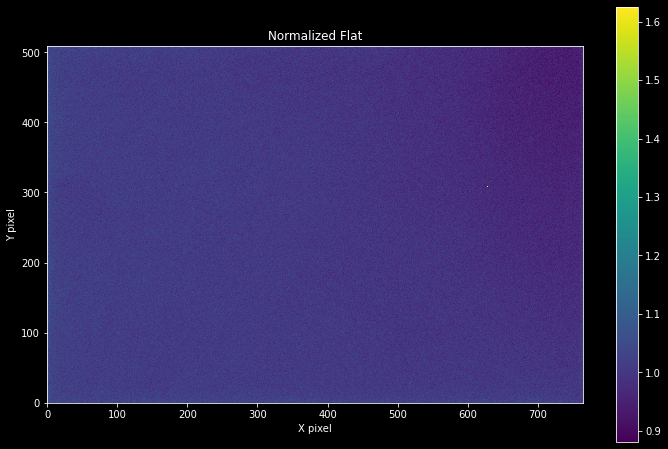

In [9]:
pl.figure(figsize=(12,8))

_=pl.imshow(normalized_mean_B_flat, origin='lower', interpolation='none')
_=pl.colorbar()
_=pl.title("Normalized Flat")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

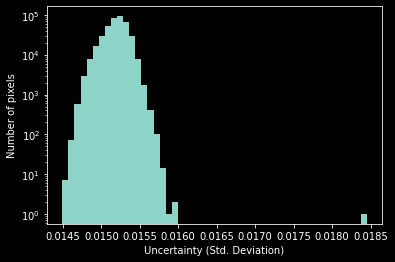

In [10]:
normalized_flat_uncertainty = flat_total_uncertainty / mean_of_flat
pl.xlabel("Uncertainty (Std. Deviation)")
pl.ylabel("Number of pixels")
_=pl.hist(normalized_flat_uncertainty.ravel(), bins=50, log=True)

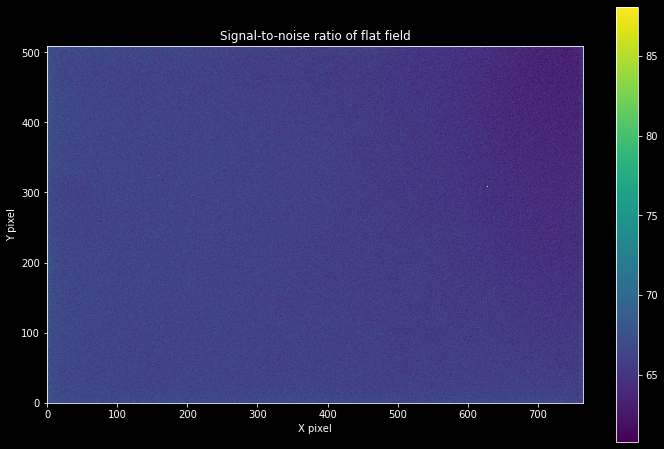

In [11]:
pl.figure(figsize=(12,8))
pl.title("Signal-to-noise ratio of flat field")
pl.imshow(normalized_mean_B_flat / normalized_flat_uncertainty, origin='lower', interpolation='none')
pl.colorbar()
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")


In [12]:
# Darks

darks_50s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks]
average_50s_dark = np.mean(darks_50s, axis=0)
stddev_50s_dark = np.std(darks_50s, axis=0)
darks_3s = [fits.getdata(x)*fits.getheader(x)['EGAIN'] for x in darks_for_algol]
average_3s_dark = np.mean(darks_3s, axis=0)
stddev_3s_dark = np.std(darks_3s, axis=0)
del darks_50s
del darks_3s

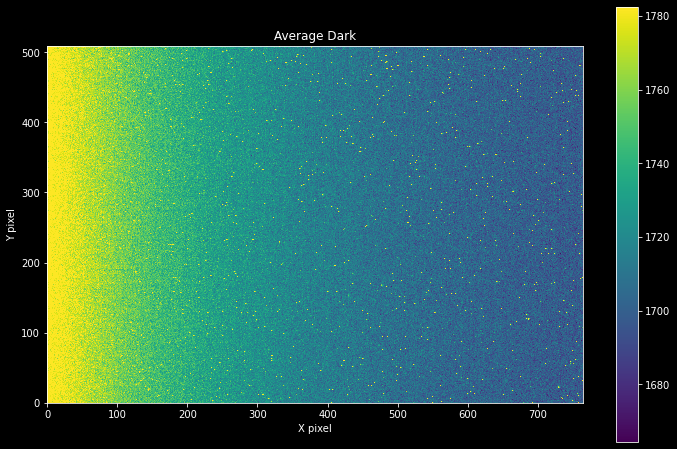

In [13]:
pl.figure(figsize=(12,8))
pl.imshow(average_50s_dark, origin='lower', interpolation='none', vmax=1150*gain)
pl.colorbar()
_=pl.title("Average Dark")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

In [14]:
uncertainty_on_50s_mean_dark = stddev_50s_dark / np.sqrt(len(darks))
uncertainty_on_3s_mean_dark = stddev_3s_dark / np.sqrt(len(darks_for_algol))

In [15]:
# HPERS
os.chdir('C:\\Users\\Pae\\Documents\\Pictures.2\\school\\school but less important files\\programming\\projects\\obs\\dataredsingleframe\\data')

fn = 'HPers_50s_B_quad2_003.FIT'
gain = fits.getheader(fn)['EGAIN']
hpers_B = fits.getdata(fn)*gain

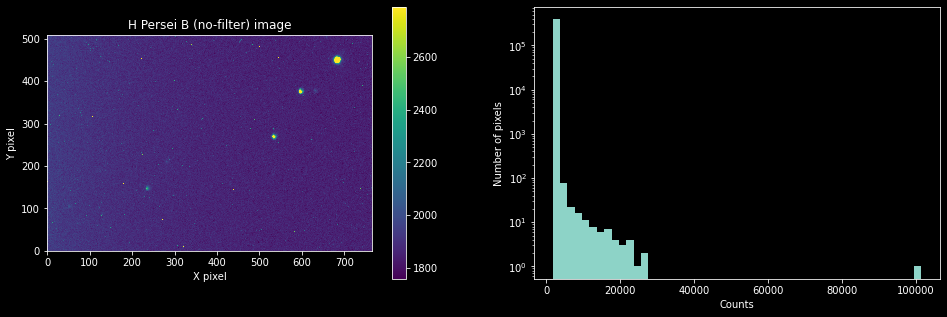

In [16]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(hpers_B, origin='lower', interpolation='none', vmax=1800*gain,)
_=pl.title("H Persei B (no-filter) image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(hpers_B.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")


In [17]:
hpers_B_darksub =hpers_B - average_50s_dark
hpers_B_darksub_uncertainty = (hpers_B_darksub + readnoise**2 + uncertainty_on_50s_mean_dark**2)**0.5

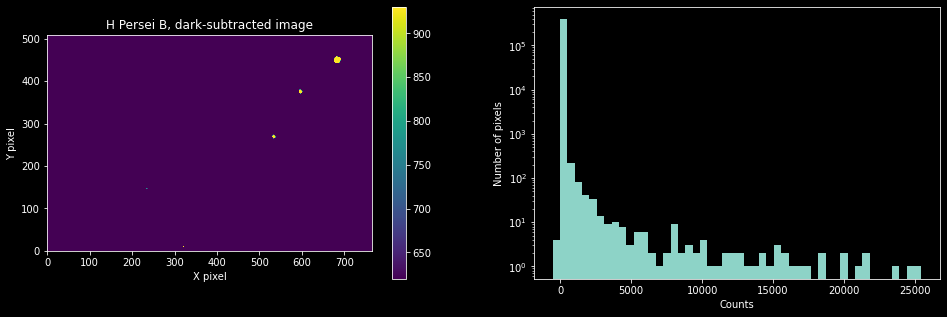

In [18]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(hpers_B_darksub, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
_=pl.title("H Persei B, dark-subtracted image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(hpers_B_darksub.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

In [19]:
hpers_B_darksub_flattened = hpers_B_darksub / normalized_mean_B_flat
hpers_B_darksub_flattened_uncertainty = ((
    hpers_B_darksub_uncertainty**2 / hpers_B_darksub**2 +
    normalized_flat_uncertainty**2 / normalized_mean_B_flat**2
) * hpers_B_darksub_flattened**2)**0.5
hpers_B_darksub_flattened_uncertainty = ((
    hpers_B_darksub_uncertainty**2 / normalized_mean_B_flat**2 +
    normalized_flat_uncertainty**2 * hpers_B_darksub**2 / normalized_mean_B_flat**4
))**0.5

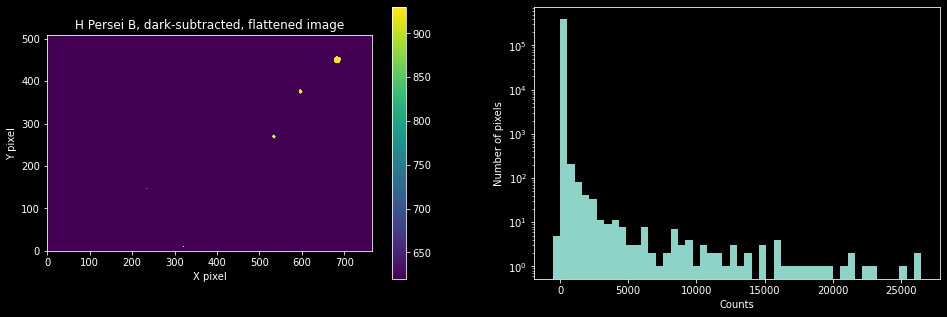

In [20]:
# basically identical
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(hpers_B_darksub_flattened, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
pl.colorbar(im)
_=pl.title("H Persei B, dark-subtracted, flattened image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

_ = pl.subplot(1,2,2).hist(hpers_B_darksub_flattened.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

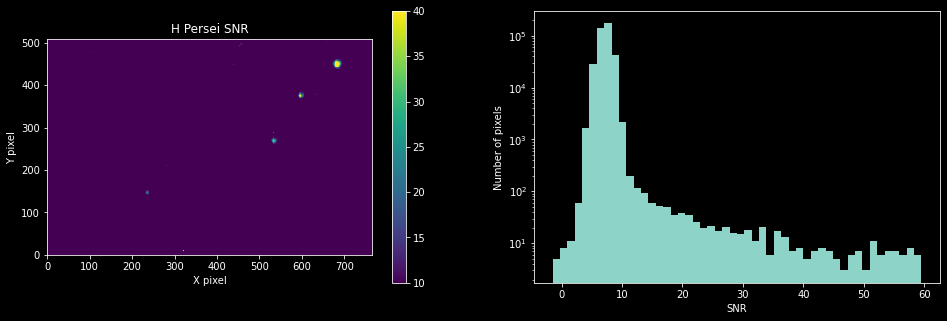

In [21]:
pl.figure(figsize=(16,5))
SNR = hpers_B_darksub_flattened / hpers_B_darksub_flattened_uncertainty
im = pl.subplot(1,2,1).imshow(SNR, origin='lower', interpolation='none', vmin=10, vmax=40)
_=pl.title("H Persei SNR")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(SNR.ravel(), bins=50, log=True)
_ = pl.xlabel("SNR")
_ = pl.ylabel("Number of pixels")

In [22]:
# Algol

fn = 'algol_3s_B_003.FIT'
gain = fits.getheader(fn)['EGAIN']
algol_B = fits.getdata(fn)*gain

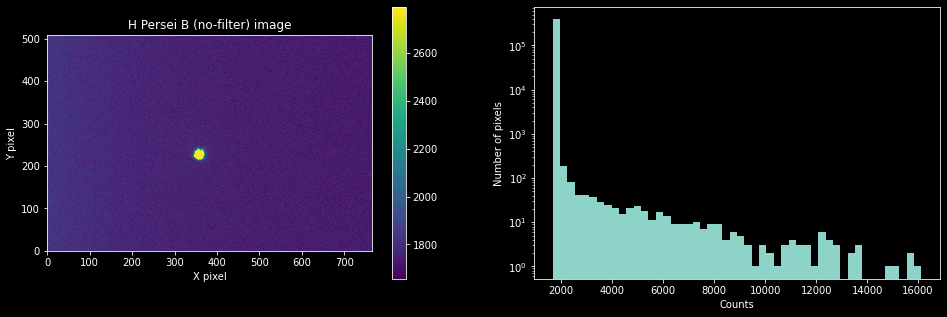

In [23]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(algol_B, origin='lower', interpolation='none', vmax=1800*gain,)
_=pl.title("H Persei B (no-filter) image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(algol_B.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")


In [24]:
algol_B_darksub =algol_B - average_3s_dark
algol_B_darksub_uncertainty = (algol_B_darksub + readnoise**2 + uncertainty_on_3s_mean_dark**2)**0.5

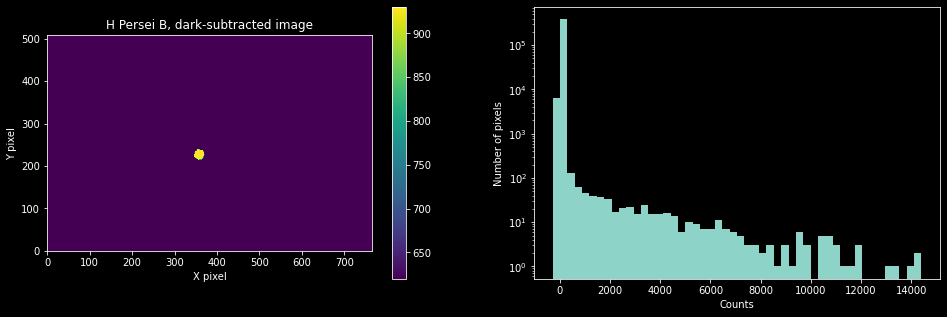

In [25]:
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(algol_B_darksub, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
_=pl.title("H Persei B, dark-subtracted image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(algol_B_darksub.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

In [26]:
algol_B_darksub_flattened = algol_B_darksub / normalized_mean_B_flat
algol_B_darksub_flattened_uncertainty = ((
    algol_B_darksub_uncertainty**2 / algol_B_darksub**2 +
    normalized_flat_uncertainty**2 / normalized_mean_B_flat**2
) * algol_B_darksub_flattened**2)**0.5
algol_B_darksub_flattened_uncertainty = ((
    algol_B_darksub_uncertainty**2 / normalized_mean_B_flat**2 +
    normalized_flat_uncertainty**2 * algol_B_darksub**2 / normalized_mean_B_flat**4
))**0.5

<ipython-input-26-71ab798189a2>:3: RuntimeWarning: divide by zero encountered in true_divide
  algol_B_darksub_uncertainty**2 / algol_B_darksub**2 +
<ipython-input-26-71ab798189a2>:2: RuntimeWarning: invalid value encountered in multiply
  algol_B_darksub_flattened_uncertainty = ((


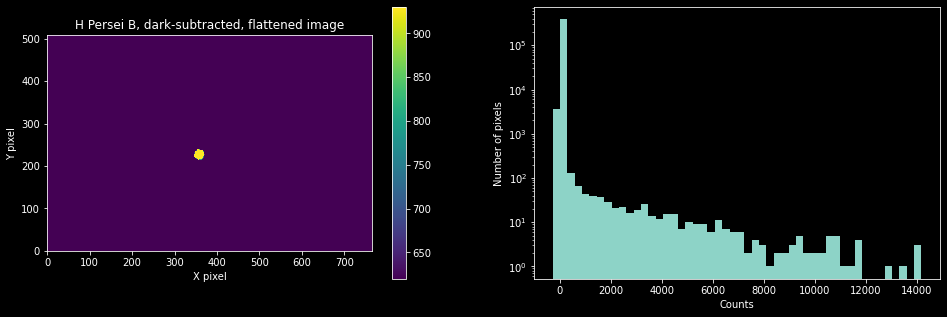

In [27]:
# basically identical
pl.figure(figsize=(16,5))
im = pl.subplot(1,2,1).imshow(algol_B_darksub_flattened, origin='lower', interpolation='none', vmax=600*gain, vmin=400*gain)
pl.colorbar(im)
_=pl.title("H Persei B, dark-subtracted, flattened image")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")

_ = pl.subplot(1,2,2).hist(algol_B_darksub_flattened.ravel(), bins=50, log=True)
_ = pl.xlabel("Counts")
_ = pl.ylabel("Number of pixels")

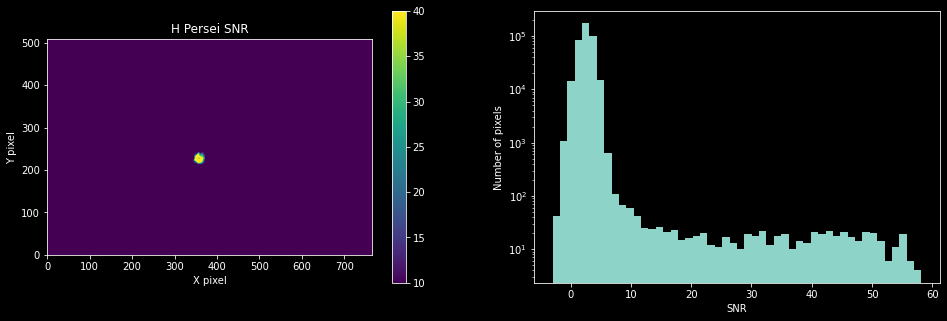

In [28]:
pl.figure(figsize=(16,5))
SNR = algol_B_darksub_flattened / algol_B_darksub_flattened_uncertainty
im = pl.subplot(1,2,1).imshow(SNR, origin='lower', interpolation='none', vmin=10, vmax=40)
_=pl.title("H Persei SNR")
_=pl.xlabel("X pixel")
_=pl.ylabel("Y pixel")
pl.colorbar(im)

_ = pl.subplot(1,2,2).hist(SNR.ravel(), bins=50, log=True)
_ = pl.xlabel("SNR")
_ = pl.ylabel("Number of pixels")

In [29]:
header = fits.getheader('HPers_50s_B_quad2_003.FIT')
filehandle = fits.PrimaryHDU(data=hpers_B_darksub_flattened, header=header)
filehandle.writeto('HPers_50s_B_quad2_003_darksub_flattened.fits', overwrite=True)

In [30]:
header = fits.getheader('HPers_50s_B_quad2_003.FIT')
filehandle = fits.PrimaryHDU(data=hpers_B_darksub_flattened_uncertainty, header=header)
filehandle.writeto('HPers_50s_B_quad2_003_darksub_flattened_uncertainty.fits', overwrite=True)

In [31]:
header = fits.getheader('algol_3s_B_003.FIT')
filehandle = fits.PrimaryHDU(data=algol_B_darksub_flattened, header=header)
filehandle.writeto('algol_3s_B_003_darksub_flattened.fits', overwrite=True)

In [32]:
header = fits.getheader('algol_3s_B_003.FIT')
filehandle = fits.PrimaryHDU(data=algol_B_darksub_flattened_uncertainty, header=header)
filehandle.writeto('algol_3s_B_003_darksub_flattened_uncertainty.fits', overwrite=True)

# I'm not sure why there's extra code below this in the preview, it's not there in my code
# I think it's just my IDE glitching, sorry!

In [ ]:
header = fits.getheader('HPers_50s_B_quad2_003.FIT')
filehandle = fits.PrimaryHDU(data=hpers_B_darksub_flattened_uncertainty, header=header)
filehandle.writeto('HPers_50s_B_quad2_003_darksub_flattened_uncertainty.fits', overwrite=True)

In [ ]:
header = fits.getheader('algol_3s_B_003.FIT')
filehandle = fits.PrimaryHDU(data=hpers_B_darksub_flattened_uncertainty, header=header)
filehandle.writeto('pleiades_30s_C_other_001_darksub_flattened_uncertainty.fits', overwrite=True)